## <center> Data Generator </center>

### <center> Polytechnic University of Leiria </center>

#### <center> Patrícia Isabel Santos Martinho </center>

Libraries

In [1]:

#from benfordslaw import benfordslaw # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2
from scipy.stats import entropy  
import pandas as pd

Variable Initialization

In [2]:
m=1000 # features
n=2000 # instances
tB=0.3 # proportion of anomalous rows
tm=0.1 # anomalies in an anomalous row
intensity_uniforme=1 # intensity (uniform noise)
intensity_gauss=10 # intensity (gaussian noise)
prop_outliers=0.05
outliers_band=(100000, 500000) # band of outliers
np.random.seed(1666)
alpha=0.05

In [3]:
qty_tB=int(n*tB) # absolute amount of anomalous rows
print(qty_tB)
qt_BL=n-qty_tB # absolute amount of BL conform rows
print(qt_BL)
A_count=int(m*tm) # absolute amount of anomalies in an anomalous row 
BL_count=int(m*(1-tm)) # absolute amount of BL conform numbers in an anomalous row 

600
1400


Funcions

In [4]:
# Funcion to generate BL conform numbers
def ben_numbers_generation (n):
    uniforme=np.random.uniform(low=0, high=1, size=n)
    bfl_numb=10**uniforme
    return bfl_numb

In [5]:
# Function to get the first digit of a number
def get_first_digit(number):
    num = abs(number)  # Work only with positive values
    if num == 0:
        return 0
    while num < 1:  # If it is a small decimal number, multiply until it has a digit in the whole part
        num *= 10
    while num >= 10:  # If it is a large number, divide until on only one digit
        num //= 10
    return int(num)  # Returns the first digit as an integer


In [6]:
# Function to calculate the frequencies of the first digits
def first_digit_frequency(numbers):
    frequencies = np.zeros(9)  # To store the frequencies of digits 1 through 9
    for number in numbers:
        first_digit = get_first_digit(number)
        frequencies[first_digit - 1] += 1  # Increases the digit count
    return frequencies


In [7]:
# Function to calculate the distribution expected by Benford’s Law
def BL_distribution(n):
    distribution = np.log10(1 + 1 / np.arange(1, 10))  # Benford’s law for digits 1 to 9
    distribution[-1] = 1 - sum(distribution[:-1])  # Adjusts the last probability
    return distribution*n

In [8]:
# Calculate accumulated frequencies from absolute frequencies

def Fr (fr):
    Frs=[]
    Frs.append(fr[0])
    for i in range(1,len(fr)):
        Frs.append(fr[i]+Frs[i-1])
    return Frs


In [9]:
#  Gaussian noise

def sum_gaussian_noise(d, intensity):
    """Adds Gaussian noise to the data"""
    noise = np.random.normal(0, intensity, len(d))
    return d + noise

In [10]:
# Uniform noise

def sum_uniforme_noise(d, intensity):
    """Adds uniform noise to the data"""
    noise = np.random.uniform(-intensity, intensity, len(d))
    return d + noise

In [11]:
# Mixed noise (gaussin noise + uniform noise)

def sum_mix_noise(d, intensity_gauss, intensity_uniforme):
    """Adds a mixture of Gaussian and uniform noise to the data"""
    noise_gauss = np.random.normal(0, intensity_gauss, len(d))
    noise_uniforme = np.random.uniform(-intensity_uniforme, intensity_uniforme, len(d))
    return d + noise_gauss + noise_uniforme

In [12]:
# Outliers

def sum_outliers(d, proportion, outliers_band):
    """Adds moderate or extreme outliers to the data set"""
    n_outliers = int(len(d) * proportion)
    indices = np.random.choice(range(len(d)), n_outliers, replace=False) # replace=falss means without repeating
    for i in indices:
        d[i] = np.random.uniform(*outliers_band)
    return d

In [13]:
# Draw chart of the proportions of the digits

def digit_chart (d,nl):
    # Creation of the figure and axes
    fig, ax = plt.subplots(figsize=(12, 6))

    # Data for the Benford’s Law chart
    prop_ds = np.array(d[nl,:-1])
         
    # Calculate the frequency of the first digits
    xv = range(1, 10)
    yv = BL_distribution(m)
    yv = yv/m

    # Plot the proportions according to Benford’s Law as a line
    ax.plot(xv, yv, marker='o', label="Benford's Law Distribution", linestyle='-', color='blue', alpha=0.6)

    # Notes for the values of Benford’s Law
    for i, value in enumerate(yv):
        ax.annotate(f'{value:.3f}',  # Round the annotation to 3 decimal places
                    xy=(xv[i], value),
                    xytext=(0, 5),  # Offset at the annotation position
                    textcoords='offset points',
                    ha='center',
                    va='bottom')

    # Data for the dataset chart
 
    x = list(range(1, 10)) 
    y = first_digit_frequency(prop_ds)
    y = y/len(prop_ds)

    # Plot the proportions of the dataset as a line
    ax.plot(x, y, marker='o', label=f"Digits frequency in line nr. {nl}", linestyle='-', color='orange', alpha=0.6)

    # Annotations for the dataset values
    for i, value in enumerate(y):
        ax.annotate(f'{value}',
                    xy=(x[i], value),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center',
                    va='bottom')

    # Axis and subtitle settings
    ax.set_xlabel("First Digit", fontsize=14)
    ax.set_ylabel("Frequency", fontsize=14)
    ax.legend(fontsize=14)
    ax.set_xticks(list(range(1, 10)))  # Defining x axis ticks
    ax.set_xticklabels(list(range(1, 10)))  # Labels for the ticks

    # display the graph
    plt.show()

Generate data

In [14]:
uniforme=np.random.uniform(low=0, high=1, size=m)
bfl_numb=10**uniforme 
result=np.append(bfl_numb,0) # follows the law of Benford, label 0
print(len(result))
print("----------------------")

i=1
i2=qt_BL+1
while i<qt_BL:
    bfl_numb=ben_numbers_generation (m)
    bfl_numb=np.append(bfl_numb,0) # 0 --> no anomalies
    bfl_numb=abs(bfl_numb)
    result = np.vstack([result, bfl_numb])
    i=i+1

while i2 in range(qt_BL+1,n+1):
    ben_aux=ben_numbers_generation (A_count)
    #anom = sum_gaussian_noise(ben_aux, intensity_gauss)
    #anom = sum_uniforme_noise(ben_aux, intensity_uniforme)
    #anom = sum_mix_noise(ben_aux, intensity_gauss, intensity_uniforme)
    anom = sum_outliers(ben_aux, prop_outliers, outliers_band)
    anom=np.random.uniform(low=0, high=100000, size=A_count)
    anom=abs(anom)
    ben=np.random.uniform(low=0, high=1, size=BL_count)
    bfl_numb=10**ben
    bfl_numb=abs(bfl_numb)
    bfl_numb=np.append(bfl_numb,anom)
    bfl_numb=np.append(bfl_numb,1) # 1 --> with anomalies
    result = np.vstack([result, bfl_numb])
    i2=i2+1
df_result=pd.DataFrame(result)
df_final = df_result.sample(frac=1, random_state=42).reset_index(drop=True)
numpy_df=array = df_final.to_numpy()




1001
----------------------


In [15]:
numpy_df

array([[1.84753539e+00, 2.38518921e+00, 4.68141129e+00, ...,
        5.12489737e+04, 7.13691325e+04, 1.00000000e+00],
       [4.43856901e+00, 4.28463968e+00, 2.40734564e+00, ...,
        1.75792114e+00, 1.99987443e+00, 0.00000000e+00],
       [2.88531997e+00, 2.20585755e+00, 3.66317192e+00, ...,
        7.62839396e+00, 1.39668254e+00, 0.00000000e+00],
       ...,
       [1.07278364e+00, 8.59728170e+00, 1.75282332e+00, ...,
        1.33013434e+00, 4.99391281e+00, 0.00000000e+00],
       [2.06793599e+00, 9.38259475e+00, 3.76875421e+00, ...,
        3.37049851e+03, 3.74541712e+04, 1.00000000e+00],
       [3.40578308e+00, 1.69720624e+00, 3.97786001e+00, ...,
        2.16100934e+00, 1.26623400e+00, 0.00000000e+00]])

In [16]:
actual_class = numpy_df[:, -1]
actual_class=actual_class.astype(int)
print(actual_class)

[1 0 0 ... 0 1 0]


In [17]:
counts = np.bincount(actual_class)
print("Negatives", counts[0])
print("Positives", counts[1])

Negatives 1400
Positives 600


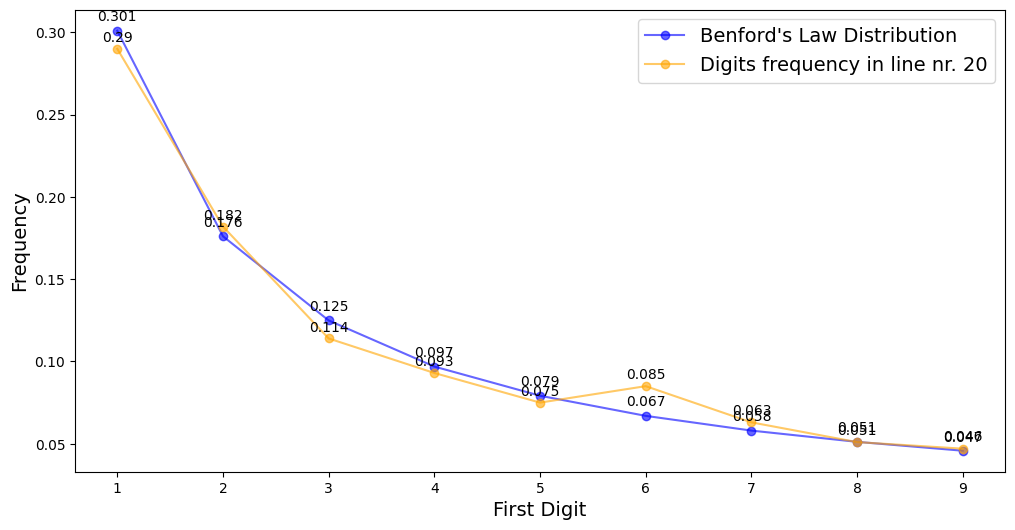

In [18]:
digit_chart (numpy_df,20)

In [19]:
type (numpy_df)

numpy.ndarray

In [20]:
np.savetxt('Dataset.txt', numpy_df, delimiter=',')